In [1]:
### softmax回归的简洁实现

In [17]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
sys.path.append('./d2lzh/')
import d2lzh_pytorch as d2l

In [18]:
### 获取并读取数据

In [19]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [20]:
### 定义并初始化模型

In [21]:
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs) # 定义模块，模块内设定输入输出的维度
    
    def forward(self, x): # x shape: (batchsize, 1, 28, 28)
        y = self.linear(x.view(x.shape[0], -1)) # y shape: (batchsize, 784)
        return y               # 前向传播定义每一层的具体输入值是什么

net = LinearNet(num_inputs, num_outputs)

In [22]:
# 这个函数的作用是将输入扁平化

class FlatenLayer(nn.Module):
    def __init__(self):
        super(FlatenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0], -1)

In [23]:
# 开始定义模型
from collections import OrderedDict

net = nn.Sequential(
    OrderedDict([
            ('flatten', FlatenLayer()),
            ('linear', nn.Linear(num_inputs, num_outputs))
    ])
)

## 以上两个函数的作用跟LinearNet函数一致.

In [24]:
# 随机初始化模型参数
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0.01)

Parameter containing:
tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100], requires_grad=True)

In [25]:
### softmax和 交叉熵损失函数

In [26]:
loss = nn.CrossEntropyLoss()  # 将两者结合起来

In [27]:
### 定义优化算法

In [28]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [29]:
### 5. 训练模型

In [30]:
num_epochs = 20
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, 
              batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.750, test acc 0.783
epoch 2, loss 0.0022, train acc 0.814, test acc 0.810
epoch 3, loss 0.0021, train acc 0.826, test acc 0.814
epoch 4, loss 0.0020, train acc 0.832, test acc 0.811
epoch 5, loss 0.0019, train acc 0.838, test acc 0.826
epoch 6, loss 0.0019, train acc 0.840, test acc 0.823
epoch 7, loss 0.0018, train acc 0.843, test acc 0.824
epoch 8, loss 0.0018, train acc 0.845, test acc 0.829
epoch 9, loss 0.0018, train acc 0.846, test acc 0.833
epoch 10, loss 0.0018, train acc 0.849, test acc 0.833
epoch 11, loss 0.0017, train acc 0.850, test acc 0.833
epoch 12, loss 0.0017, train acc 0.851, test acc 0.831
epoch 13, loss 0.0017, train acc 0.853, test acc 0.836
epoch 14, loss 0.0017, train acc 0.852, test acc 0.836
epoch 15, loss 0.0017, train acc 0.853, test acc 0.837
epoch 16, loss 0.0017, train acc 0.854, test acc 0.838
epoch 17, loss 0.0017, train acc 0.855, test acc 0.836
epoch 18, loss 0.0017, train acc 0.855, test acc 0.833
epoch 19, loss 0.00

In [31]:
### 6. 测试模型

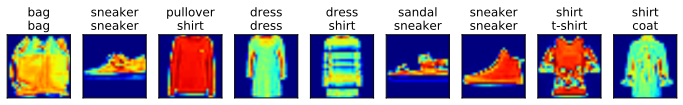

In [32]:
X, y = iter(test_iter).next()

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())

titles = [true + '\n' + pred
         for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])